In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
pd.options.display.max_columns=None

In [2]:
df = pd.read_csv('train.csv')

In [3]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [4]:
feature_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

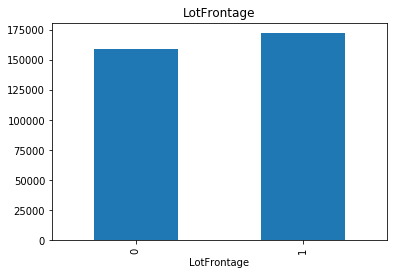

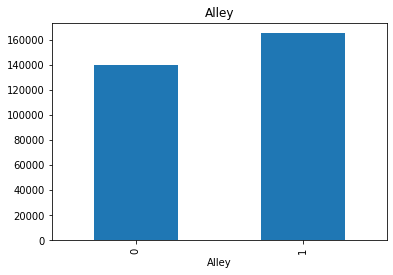

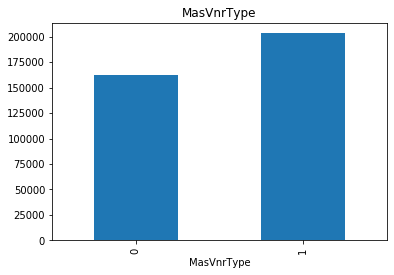

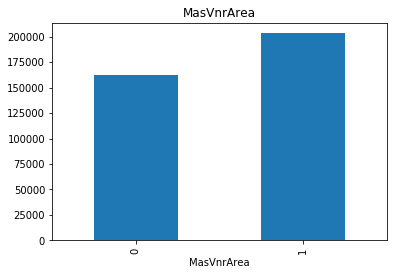

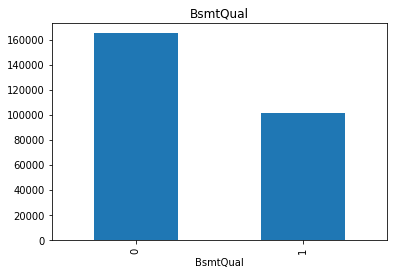

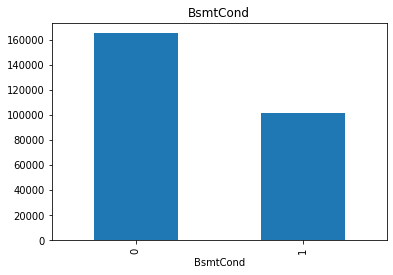

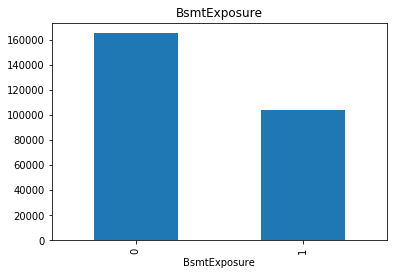

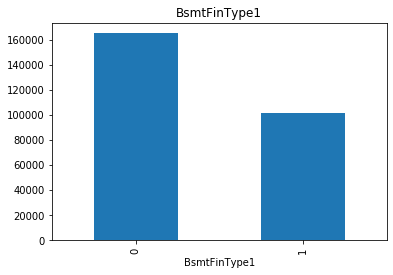

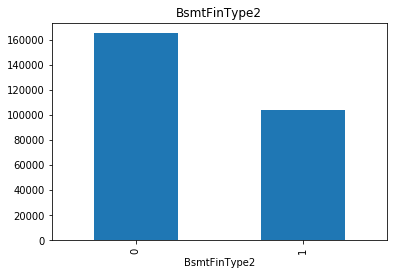

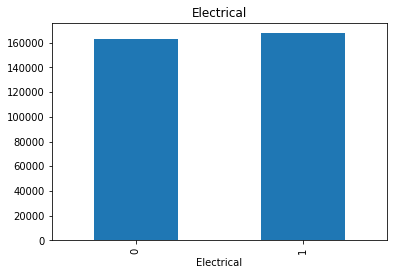

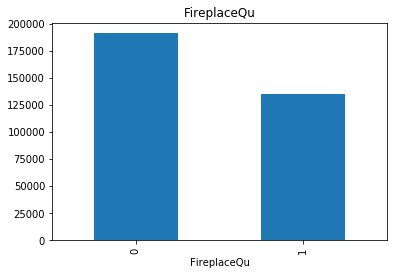

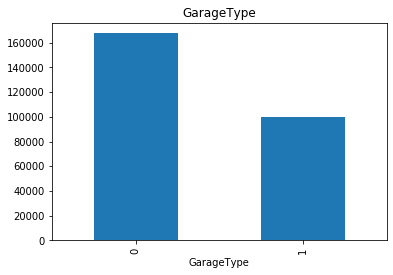

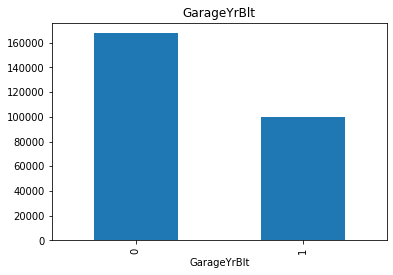

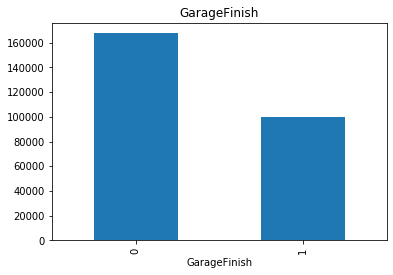

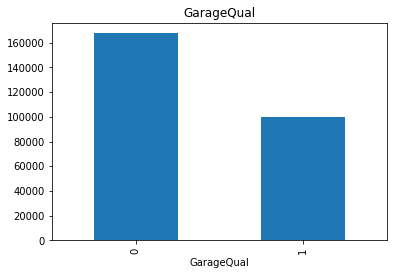

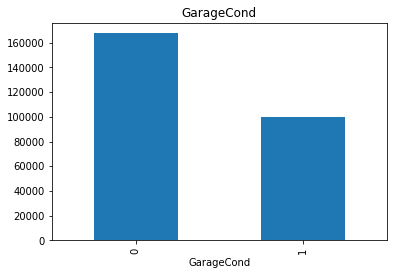

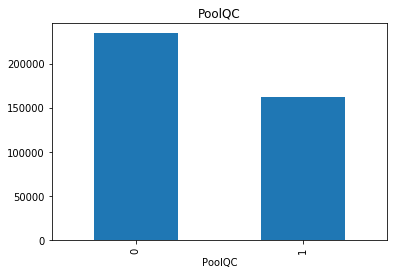

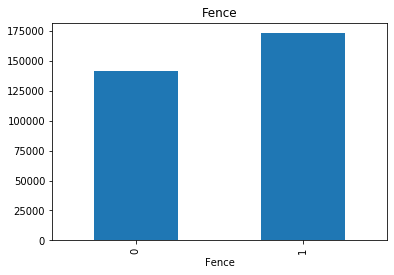

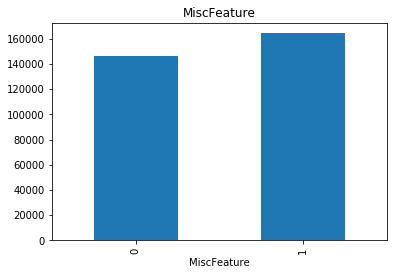

In [5]:
# find out whether null values records has impact on sale value
for feat in feature_with_na:
    data = df.copy()
    data[feat] = np.where(data[feat].isnull(),1,0)
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.show()

In [13]:
#get categorical feature with missong values
cat_feature = [feature for feature in df.columns if(df[feature].dtypes=='O' and df[feature].isnull().sum()>0)]

In [18]:
#get percentage of missing values in feature
for feat in cat_feature:
    data=df.copy()
    data[feat] = np.where(data[feat].isnull(),1,0)
    print("{}, missing values are {}%".format(feat,np.round(data[feat].mean(),4)))

Alley, missing values are 0.9377%
MasVnrType, missing values are 0.0055%
BsmtQual, missing values are 0.0253%
BsmtCond, missing values are 0.0253%
BsmtExposure, missing values are 0.026%
BsmtFinType1, missing values are 0.0253%
BsmtFinType2, missing values are 0.026%
Electrical, missing values are 0.0007%
FireplaceQu, missing values are 0.4726%
GarageType, missing values are 0.0555%
GarageFinish, missing values are 0.0555%
GarageQual, missing values are 0.0555%
GarageCond, missing values are 0.0555%
PoolQC, missing values are 0.9952%
Fence, missing values are 0.8075%
MiscFeature, missing values are 0.963%


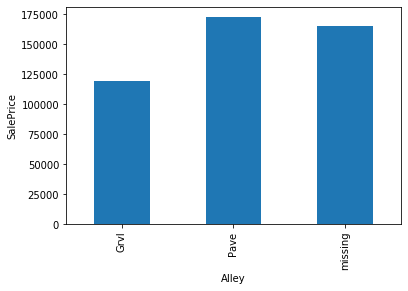

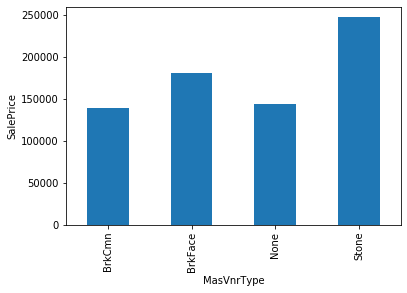

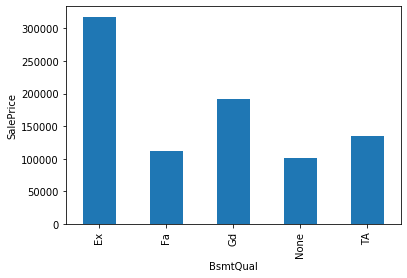

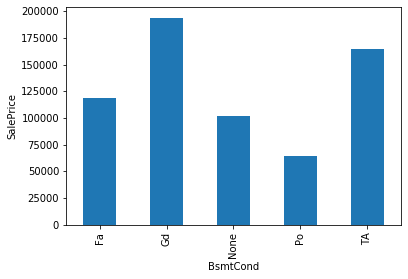

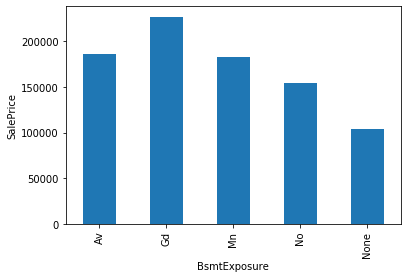

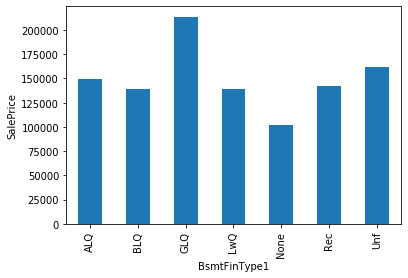

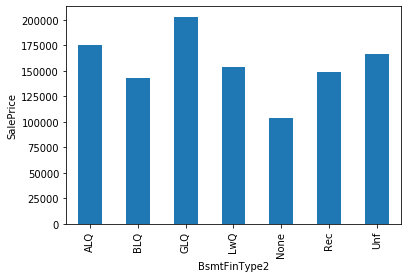

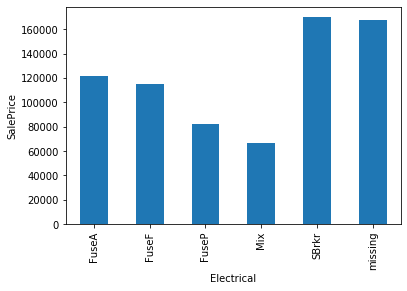

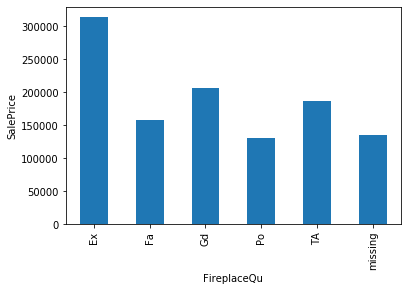

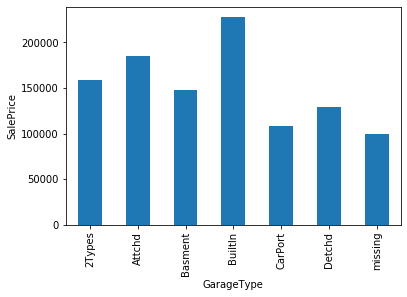

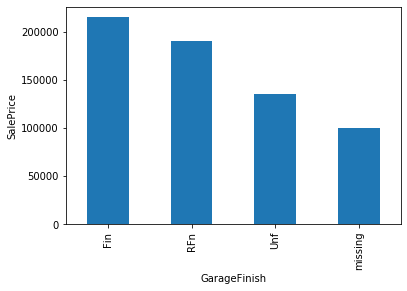

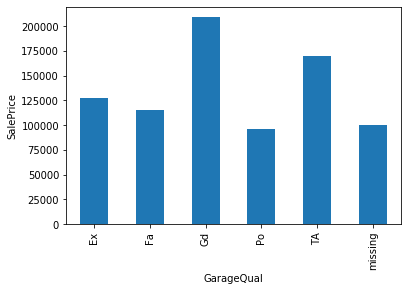

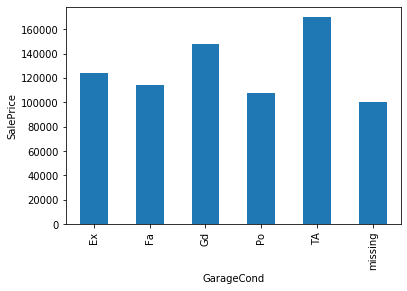

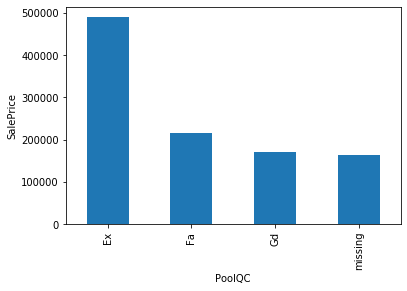

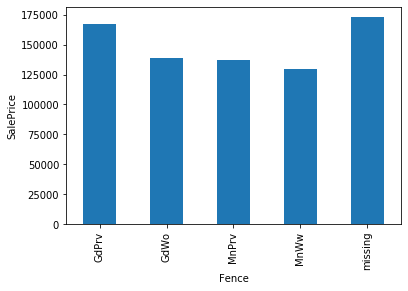

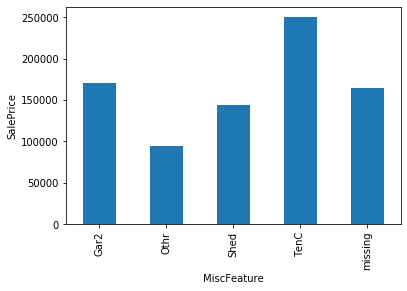

In [83]:
#no. of categories foreach feature
for feature in cat_feature:
    data=df.copy()
    data[feature] = np.where(data[feature].isnull(),'missing',data[feature])
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [122]:
#replace missing value by None for Alley feature
#df.loc[df['Alley'].isnull()]
df['Alley'].fillna('None',inplace=True)

In [64]:
#replace missing value by None for MasVnrType feature and zero for MasVnrArea 
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0.0,inplace=True)

In [82]:
#BsmtQual(None),BsmtCond(None),BsmtExposure(None),BsmtFinType1(None),BsmtFinSF1(0),BsmtFinType2(None),BsmtFinSF2(0),BsmtUnfSF(0),TotalBsmtSF(0)
df['BsmtQual'].fillna('None',inplace=True)
df['BsmtCond'].fillna('None',inplace=True)
df['BsmtFinType1'].fillna('None',inplace=True)
df['BsmtFinType2'].fillna('None',inplace=True)
df['BsmtExposure'].fillna('None',inplace=True)

In [94]:
#Electrical has single nan value, I replaced it by mode
#df.loc[df['Electrical'].isnull()]#id=1380 index 1379 drop
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [100]:
#FireplaceQu replace by 'None'
#df.loc[df['FireplaceQu'].isnull()]
df['FireplaceQu'].fillna('None',inplace=True)

In [106]:
#GarageType(None),GarageFinish(None),GarageQual(None),GarageCond(None)
df['GarageType'].fillna('None',inplace=True)
df['GarageFinish'].fillna('None',inplace=True)
df['GarageQual'].fillna('None',inplace=True)
df['GarageCond'].fillna('None',inplace=True)

In [112]:
#PoolQC(),Fence,MiscFeature
#df['PoolQC'].unique()
#df['Fence'].unique()
#df['MiscFeature'].unique()
df['PoolQC'].fillna('None',inplace=True)
df['Fence'].fillna('None',inplace=True)
df['MiscFeature'].fillna('None',inplace=True)

In [21]:
#year features
year_features = [feature for feature in df.columns if('Yr' in feature or 'Year' in feature)]

In [22]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
#get numerical features
numerical_features = [feature for feature in df.columns if(df[feature].dtypes != 'O')]# and feature not in year_features and feature not in 'Id')]

In [31]:
#discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features and feature not in 'Id']

In [33]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

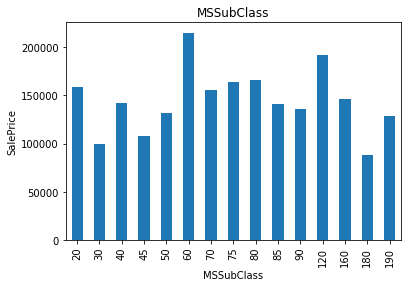

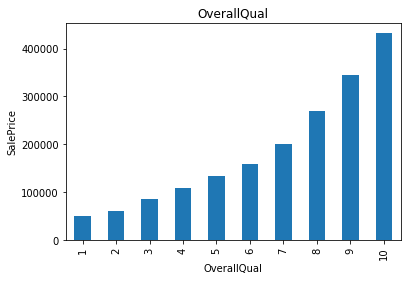

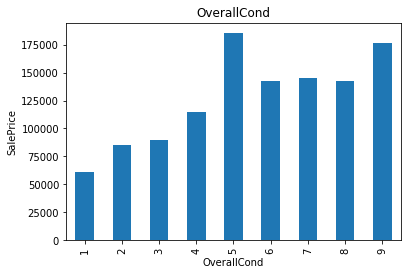

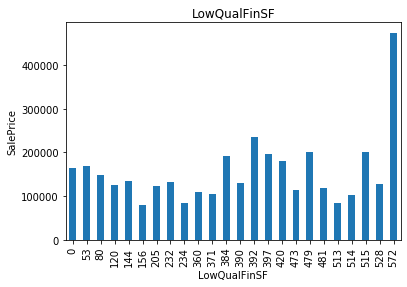

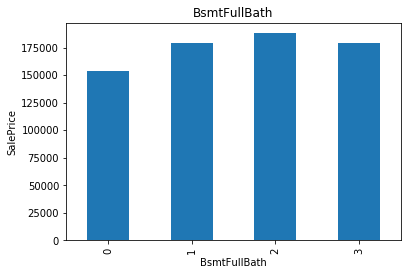

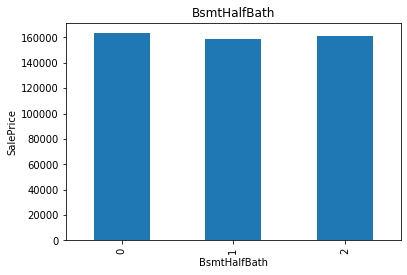

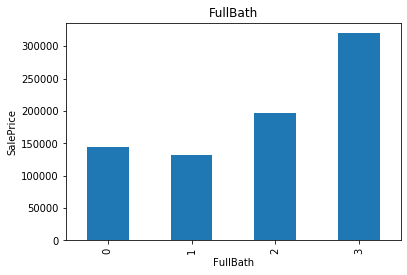

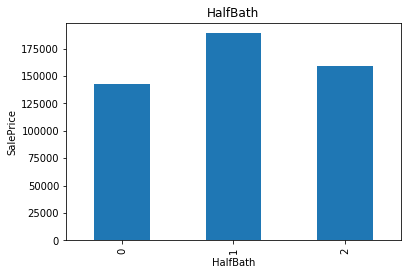

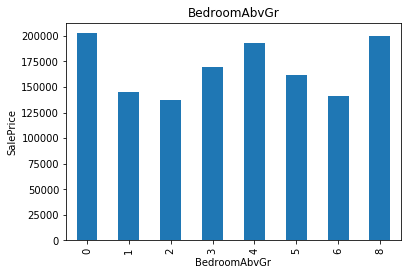

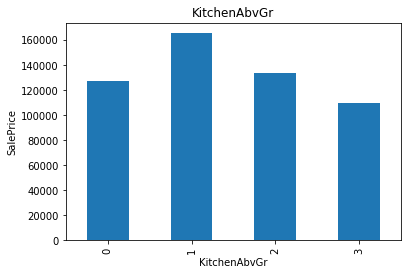

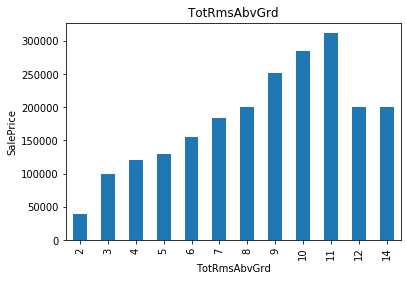

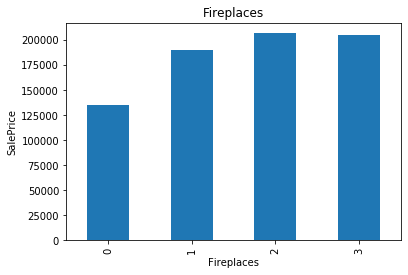

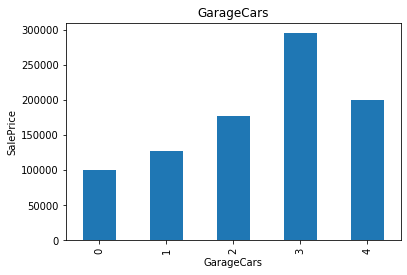

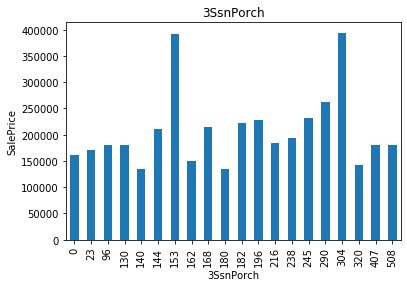

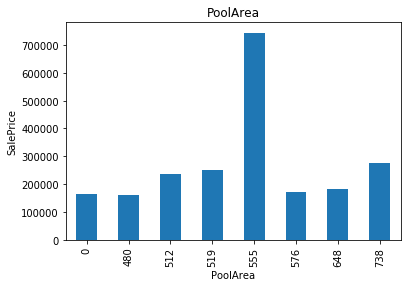

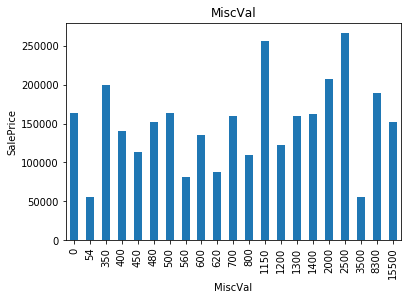

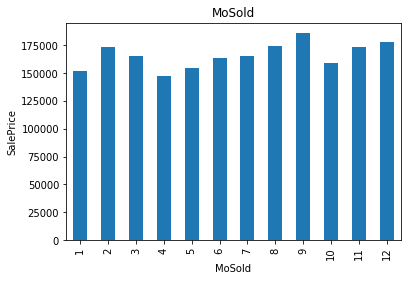

In [34]:
#display sales price for discrete feaTURE
for feat in discrete_features:
    data = df.copy()
    df.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

In [35]:
#continuous variable 
#create histogram for such variables
#find out the distribution for these variables
#if data is skewed for any variable, apply log transformation for such variables

continuous_features = [feat for feat in numerical_features if feat not in year_features + discrete_features+['Id']]


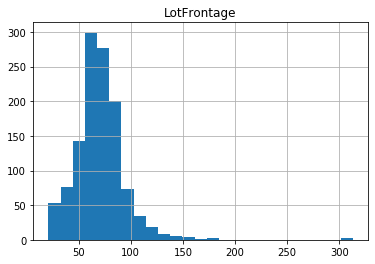

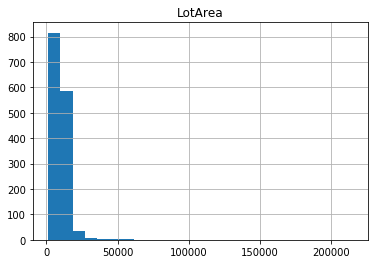

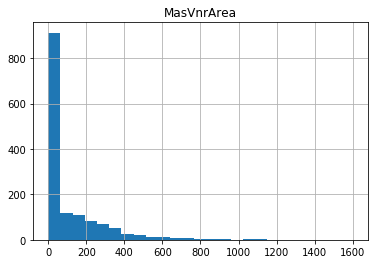

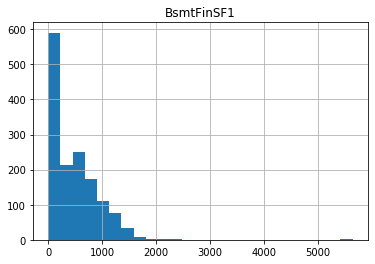

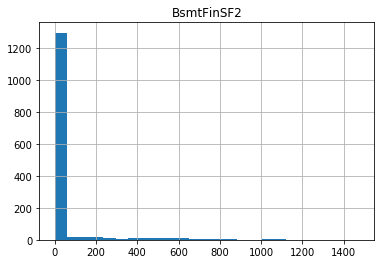

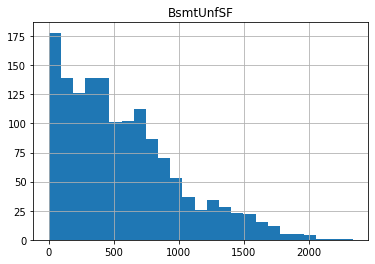

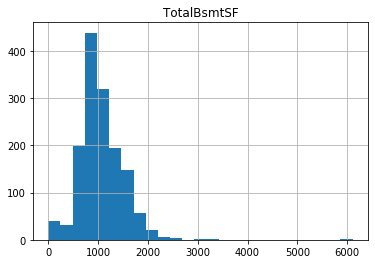

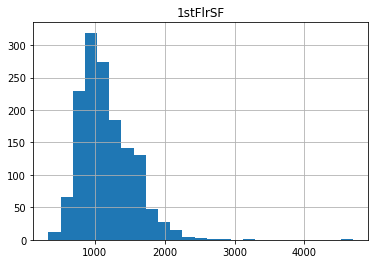

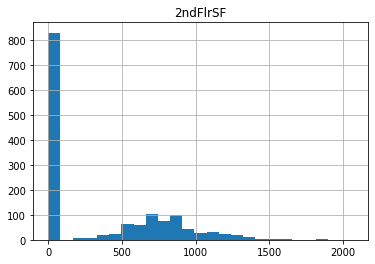

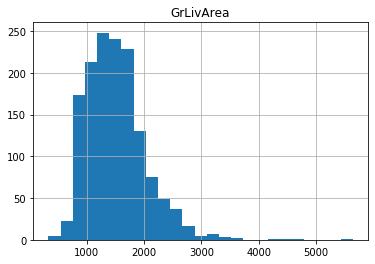

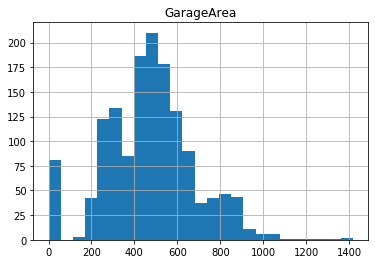

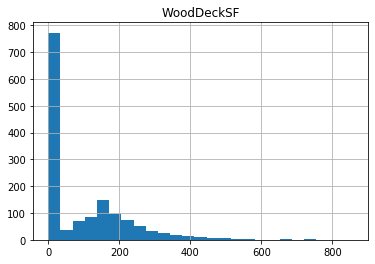

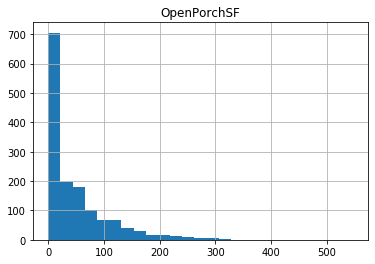

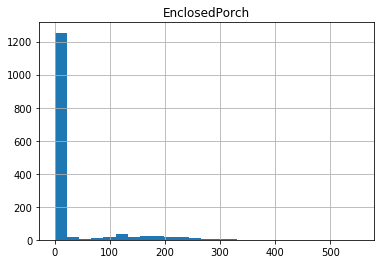

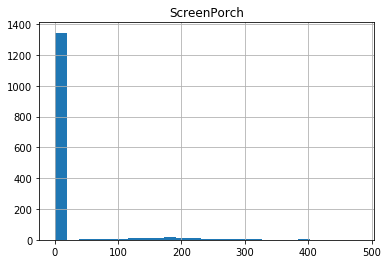

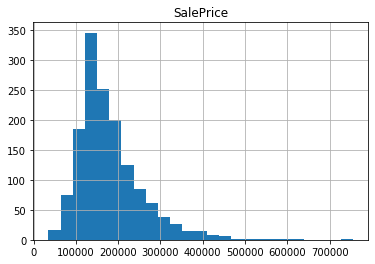

In [40]:
#plot histogram
for feat in continuous_features:
    data = df.copy()
    data[feat].hist(bins=25)
    plt.title(feat)
    plt.show()

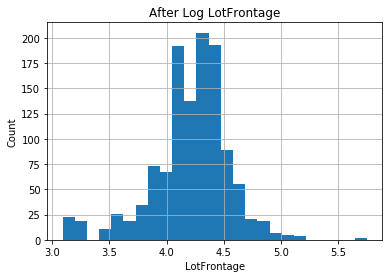

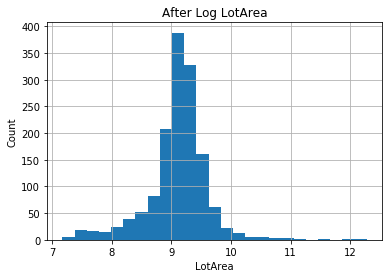

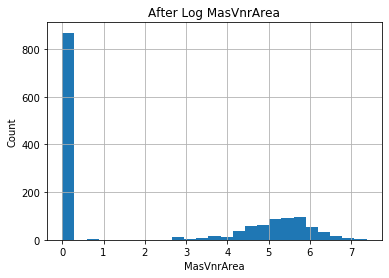

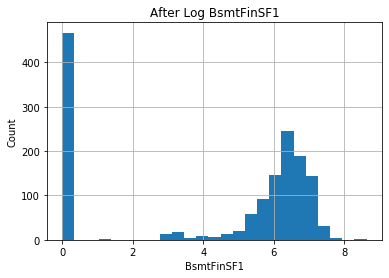

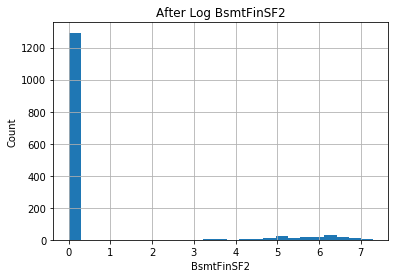

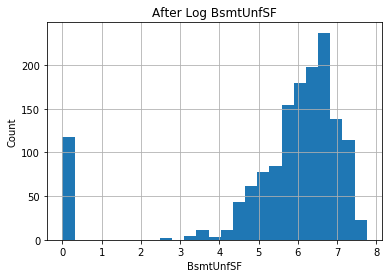

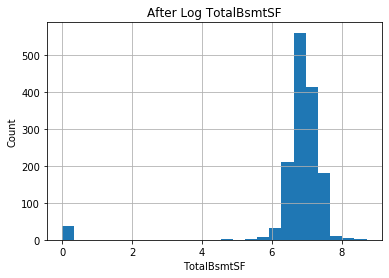

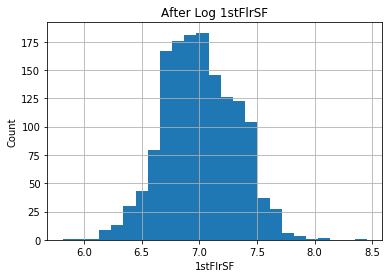

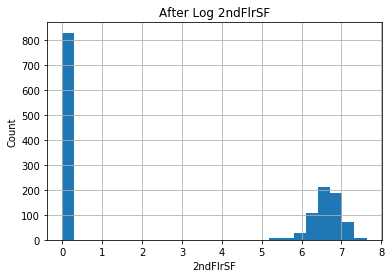

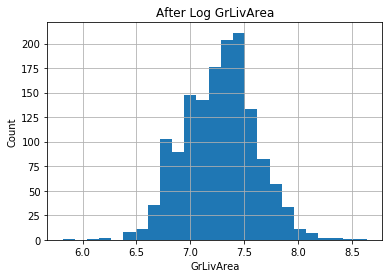

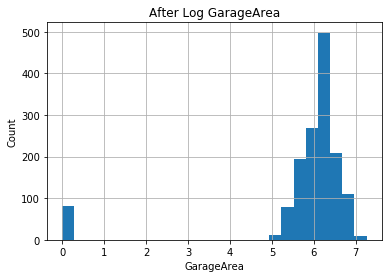

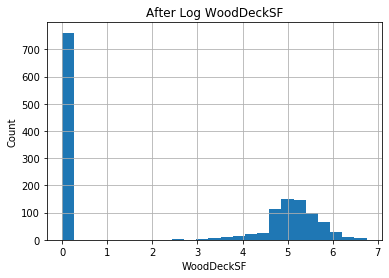

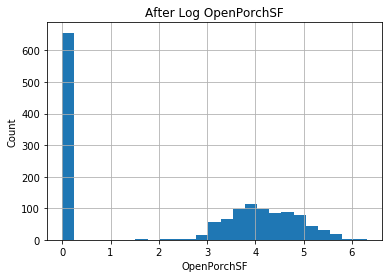

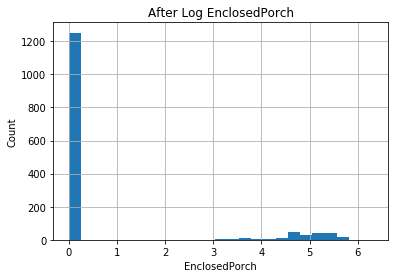

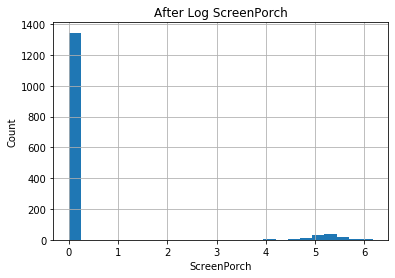

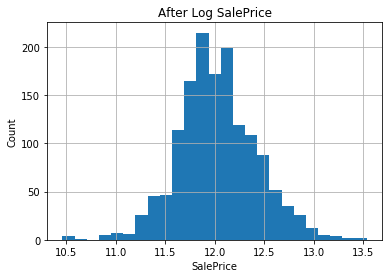

In [123]:
#perform log transformation
for feature in continuous_features:
    df[feature] = np.log1p(df[feature])
    df[feature].hist(bins=25)
    plt.title('After Log {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#find out outliers
for 